In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [5]:
fake_job_postings = pd.read_csv("../data/fake_job_postings.csv")


In [6]:
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
fake_job_postings.shape

(17880, 18)

In [8]:
fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
numeric_cols = fake_job_postings.select_dtypes(include='number')  # sirf numeric
corr = numeric_cols.corr()


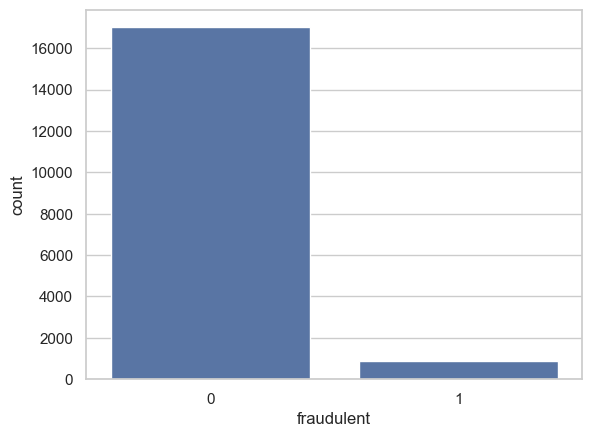

In [12]:
sns.countplot(x='fraudulent', data=fake_job_postings);

In [13]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings, hue="fraudulent",
              order=fake_job_postings[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

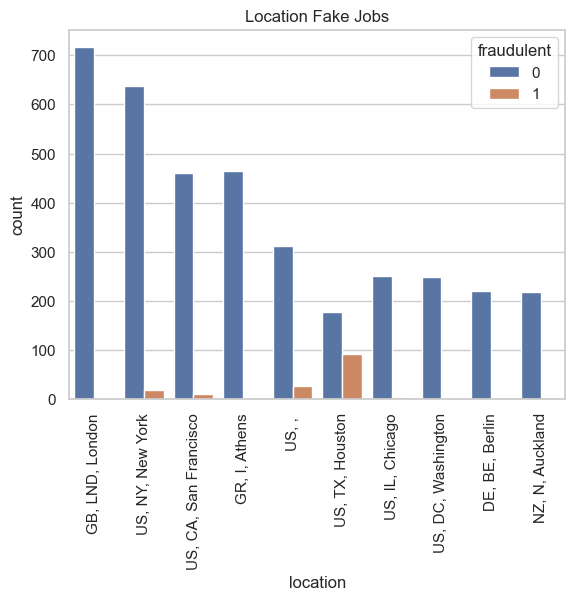

In [14]:
sns_countplot('location')

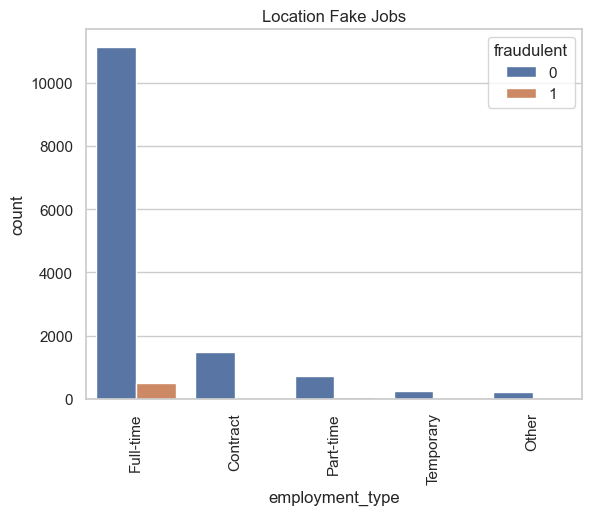

In [15]:
sns_countplot('employment_type')

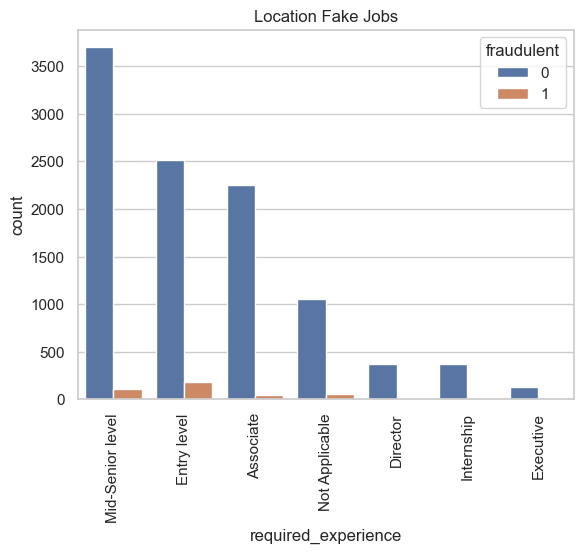

In [16]:
sns_countplot('required_experience')

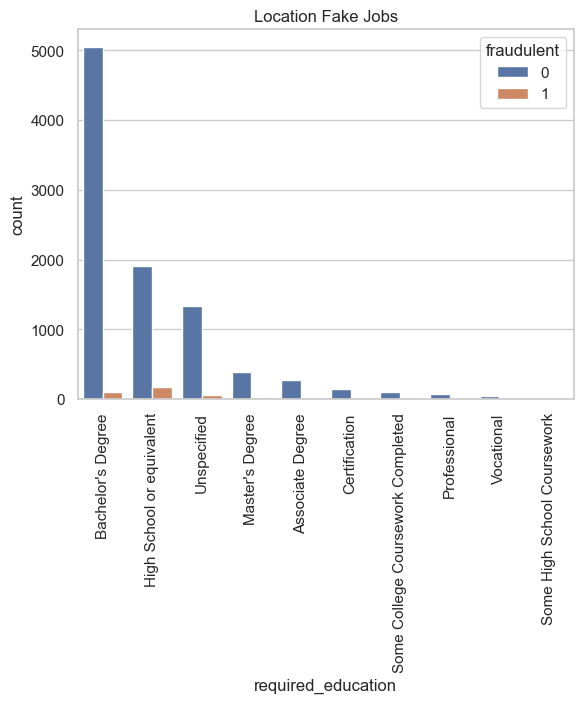

In [17]:
sns_countplot('required_education')

In [18]:
location_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('location').location.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('location').location.count(), 2)
location_ratio = pd.DataFrame({'location':location_ratio.index, 'ratio':location_ratio.values})

In [19]:
fake_job_postings = fake_job_postings.merge(location_ratio)

In [20]:
fake_job_postings.ratio.fillna(0, inplace=True)

C:\Users\Mithlesh\AppData\Local\Temp\ipykernel_1848\3866490239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fake_job_postings.ratio.fillna(0, inplace=True)


In [21]:
location_ratio_dict = {}

for key, value in zip(fake_job_postings.location, fake_job_postings.ratio):
    location_ratio_dict[key] = value

In [22]:
location_ratio_df = pd.DataFrame()
location_ratio_df_ratio = []
location_ratio_df_country = []
location_ratio_df_state = []
location_ratio_df_city = []
for key, value in zip(location_ratio_dict.keys(), location_ratio_dict.values()):
    keys = key.split(',')
    print(keys, value)
    # for v in keys:
    #     clean_key = v.strip()
    #     location_ratio_df_country.append(clean_key[0])
    #     location_ratio_df_state.append(clean_key[1])
    #     location_ratio_df_city.append(clean_key[2])
    # location_ratio_df_ratio.append(value)

['US', ' NY', ' New York'] 0.03
['NZ', ' ', ' Auckland'] 0.0
['US', ' IA', ' Wever'] 0.0
['US', ' DC', ' Washington'] 0.01
['US', ' FL', ' Fort Worth'] 0.0
['US', ' MD', ' '] 1.0
['DE', ' BE', ' Berlin'] 0.0
['US', ' CA', ' San Francisco'] 0.02
['US', ' FL', ' Pensacola'] 0.14
['US', ' AZ', ' Phoenix'] 0.01
['US', ' NJ', ' Jersey City'] 0.0
['GB', ' LND', ' London'] 0.0
['US', ' CT', ' Stamford'] 0.0
['US', ' FL', ' Orlando'] 0.02
['AU', ' NSW', ' Sydney'] 0.61
['SG', ' 01', ' Singapore'] 0.0
['IL', ' ', ' Tel Aviv', ' Israel'] 0.0
['GB', ' SOS', ' Southend-on-Sea'] 0.0
['US', ' PA', ' USA Northeast'] 0.0
['US', ' TX', ' Austin'] 0.04
['NZ', ' N', ' Auckland'] 0.0
['AE', ' ', ' '] 0.2
['US', ' CA', ' Carlsbad'] 0.0
['US', ' NY', ' New York '] 0.0
['SG', ' ', ' '] 0.0
['AE', ' AZ', ' Abudhabi'] 0.0
['US', ' MO', ' St. Louis'] 0.01
['CA', ' ON', ' Toronto'] 0.05
['US', ' MA', ' Waltham'] 0.0
['US', ' KS', ' '] 0.0
['US', ' WA', ' Everett'] 0.0
['US', ' CA', ' San Ramon'] 0.0
['GB', ' LND

In [23]:
location_ratio = location_ratio[location_ratio.ratio >= 1]

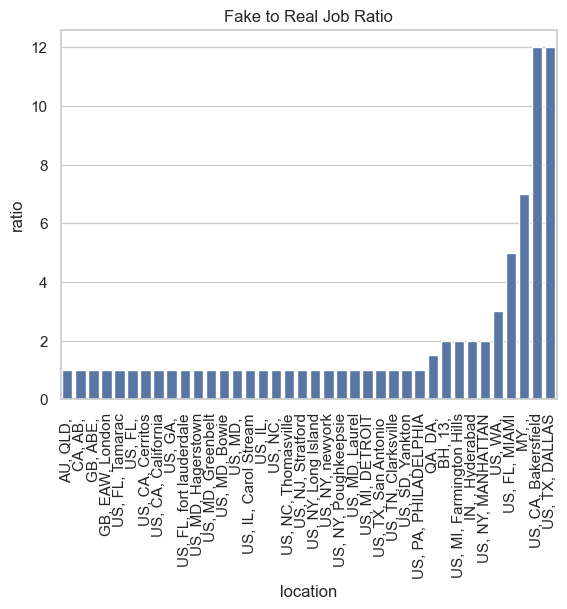

In [24]:
sns.barplot(data=location_ratio.sort_values(by='ratio'), x='location', y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

In [25]:
fake_job_postings.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'ratio'],
      dtype='object')

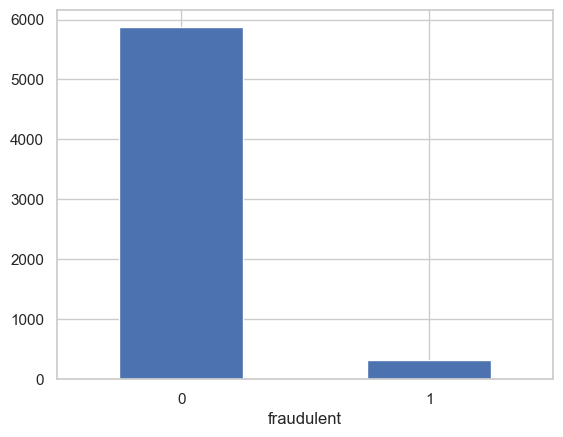

In [26]:
y_axis = fake_job_postings[fake_job_postings.function.isna()][['fraudulent', 'function']]
y_axis = y_axis.fraudulent.value_counts()
y_axis.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [27]:
def missing_count(feature, title='None'):
    y_axis = fake_job_postings[fake_job_postings[feature].isna()][['fraudulent', feature]]
    y_axis = y_axis.fraudulent.value_counts()
    y_axis.plot(kind='bar')
    plt.ylabel('Count')
    plt.xlabel('Category')
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()
    return 0

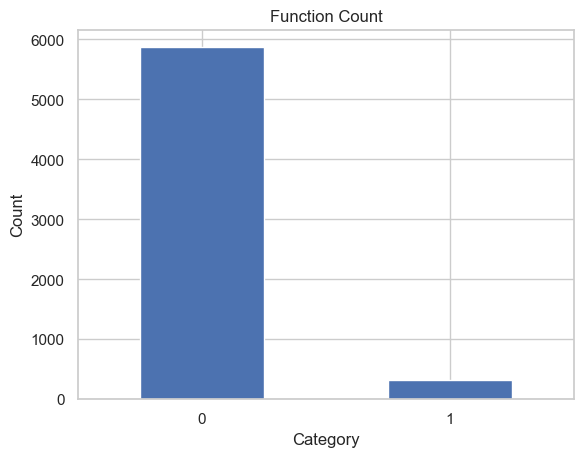

0

In [28]:
missing_count('function', 'Function Count')

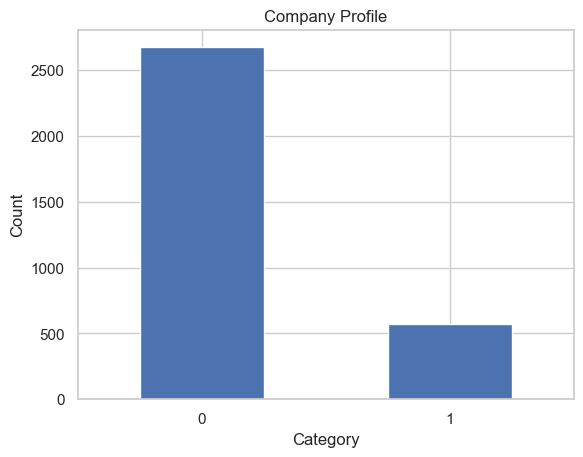

0

In [29]:
missing_count('company_profile', 'Company Profile')

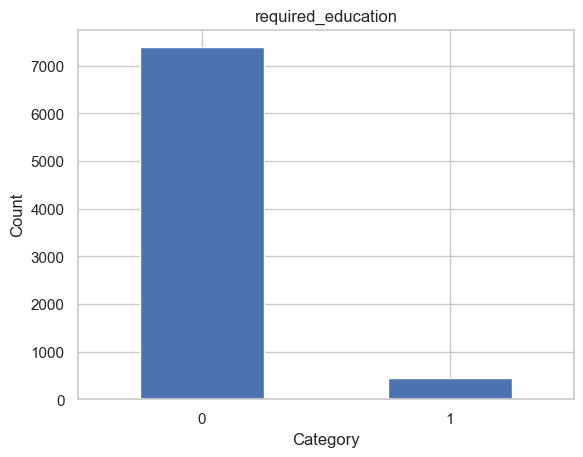

0

In [30]:
missing_count('required_education', 'required_education')

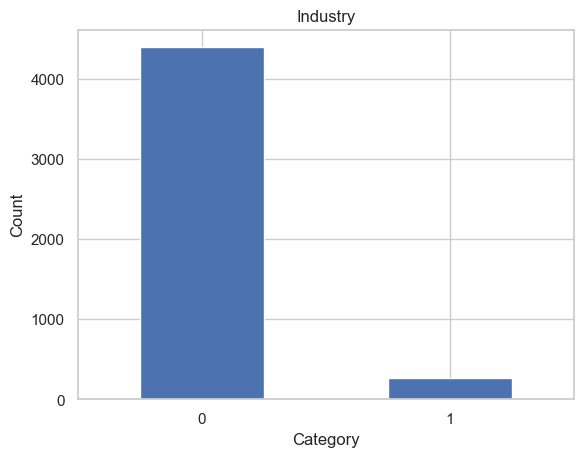

0

In [31]:
missing_count('industry', 'Industry')

In [32]:
fake_job_postings[(fake_job_postings.telecommuting == 0) & (fake_job_postings.fraudulent == 1)][['telecommuting', 'fraudulent']]

,telecommuting,fraudulent
98,0,1
172,0,1
179,0,1
213,0,1
352,0,1
...,...,...
17482,0,1
17483,0,1
17484,0,1
17485,0,1


In [33]:
fake_job_postings.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'ratio'],
      dtype='object')

In [34]:
telecommuting_list = []
has_company_logo_list = []

for idx, tel, logo in zip(range(len(fake_job_postings)), fake_job_postings.telecommuting, fake_job_postings.has_company_logo):
    if fake_job_postings.fraudulent[idx] == 1:
        telecommuting_list.append(tel)
        has_company_logo_list.append(logo)
    else:
        pass

telecommuting_logo_df = pd.DataFrame({'telecommuting':telecommuting_list, 'has_company_logo':has_company_logo_list})

In [35]:
fake_count = 0

for fraud, tel, logo in zip(fake_job_postings.fraudulent, fake_job_postings.telecommuting, fake_job_postings.has_company_logo):
    if (tel == 0 and logo == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

526


In [36]:
len(fake_job_postings[fake_job_postings.fraudulent == 1])

847

In [37]:
fake_count/len(fake_job_postings[fake_job_postings.fraudulent == 1]) * 100

62.10153482880756

In [38]:
fake_job_postings.fillna(" ",inplace = True)

fake_job_postings['text'] =  fake_job_postings['title'] + ' ' + fake_job_postings['location'] + ' ' + fake_job_postings['company_profile'] + ' ' + \
        fake_job_postings['description'] + ' ' + fake_job_postings['requirements'] + ' ' + fake_job_postings['benefits'] + ' ' + \
        fake_job_postings['required_experience'] + ' ' + fake_job_postings['required_education'] + ' ' + fake_job_postings['industry'] + ' ' + fake_job_postings['function']


fake_job_postings.drop(['job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function'], axis = 1, inplace = True)

In [39]:
fake_job_postings['character_count'] = fake_job_postings.text.apply(len)

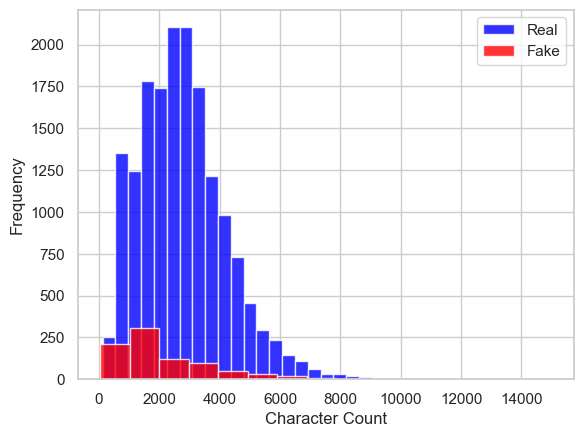

In [40]:
fake_job_postings[fake_job_postings.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
fake_job_postings[fake_job_postings.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.xlabel("Character Count");

## Text Data Tokenization

In [41]:
import time
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import RegexpTokenizer

In [42]:
from nltk.tokenize import word_tokenize
import re

In [43]:
#pattern_url = "#URL\_d"

fake_job_postings_fraud_only = fake_job_postings[fake_job_postings.fraudulent == 1]
fake_job_postings_not_fraud = fake_job_postings[fake_job_postings.fraudulent == 0]

In [44]:
tokenized_lines_fraud = [regexp_tokenize(t, "\w+") for t in fake_job_postings_fraud_only.text]
line_num_words_fraud = [len(t_line) for t_line in tokenized_lines_fraud]

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Mithlesh\AppData\Local\Temp\ipykernel_1848\3573047430.py:1: SyntaxWarning: invalid escape sequence '\w'
  tokenized_lines_fraud = [regexp_tokenize(t, "\w+") for t in fake_job_postings_fraud_only.text]


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Mithlesh\AppData\Local\Temp\ipykernel_1848\771482028.py:1: SyntaxWarning: invalid escape sequence '\w'
  tokenized_lines_not_fraud = [regexp_tokenize(t, "\w+") for t in fake_job_postings_not_fraud.text]


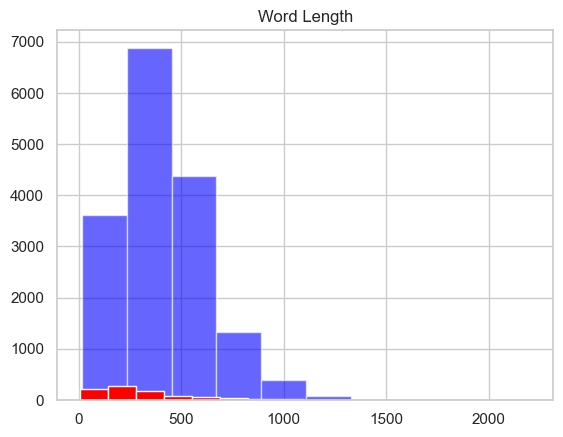

In [45]:
tokenized_lines_not_fraud = [regexp_tokenize(t, "\w+") for t in fake_job_postings_not_fraud.text]
line_num_words_not_fraud = [len(t_line) for t_line in tokenized_lines_not_fraud]
plt.hist(line_num_words_not_fraud, label='Real', color='blue', alpha=0.6)
plt.hist(line_num_words_fraud, label='Fake', color='red')
plt.title('Word Length')
plt.show()

In [46]:
# Punctuation removal

def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [47]:
fake_job_postings['text'] = fake_job_postings['text'].apply(lambda x: remove_punctuation(x))

In [48]:
fake_job_postings.text.head()

0    Marketing Intern US NY New York Were Food52 an...
1    Customer Service  Cloud Video Production NZ  A...
2    Commissioning Machinery Assistant CMA US IA We...
3    Account Executive  Washington DC US DC Washing...
4    Bill Review Manager US FL Fort Worth SpotSourc...
Name: text, dtype: object

In [49]:
# Toeknization

tokenizer = RegexpTokenizer(r'\w+')
fake_job_postings_tokenized = fake_job_postings
fake_job_postings_tokenized['text'] = fake_job_postings_tokenized['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [50]:
# Removing stopwords

In [51]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return(words)

In [52]:
fake_job_postings_tokenized['text'] = fake_job_postings_tokenized['text'].apply(lambda x: remove_stopwords(x))

In [53]:
# Lemmentizing
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text


fake_job_postings_tokenized['text'] = fake_job_postings_tokenized['text'].apply(lambda x: word_lemmatizer(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mithlesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
# Stemming

stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text


fake_job_postings_tokenized['text'] = fake_job_postings_tokenized['text'].apply(lambda x: word_stemmer(x))

In [55]:
import re

pattern = r'[0-9]'

for text in fake_job_postings_tokenized['text']:
    fake_job_postings_tokenized['text'] = re.sub(pattern, '', text)

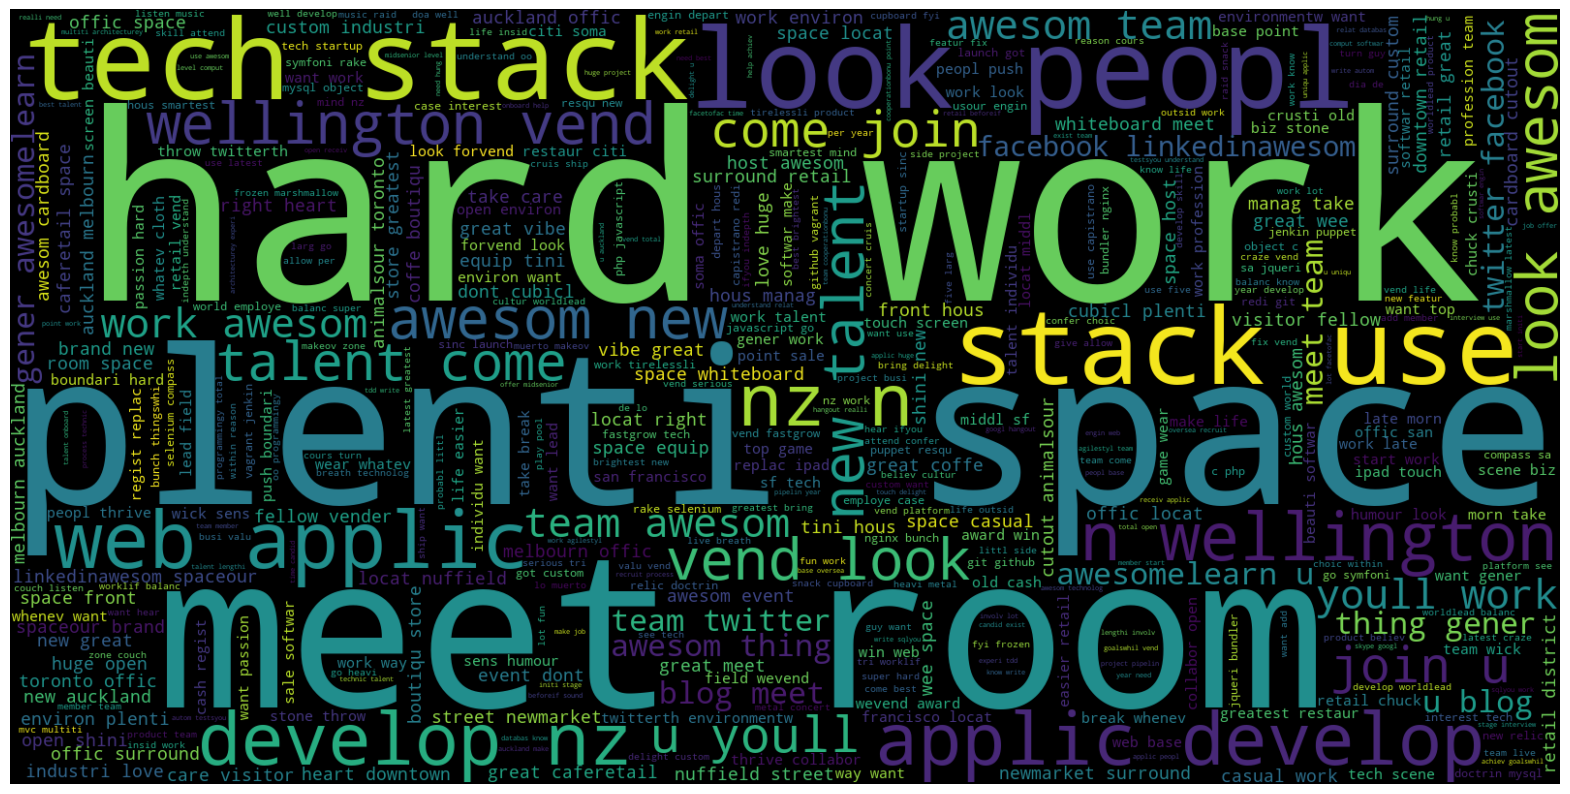

In [65]:
# Required imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Figure size
plt.figure(figsize=(20,20))

# WordCloud generate
wc = WordCloud(width=1600, height=800, max_words=3000).generate(
    " ".join(fake_job_postings[fake_job_postings.fraudulent == 0]['text'])
)

# Display
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


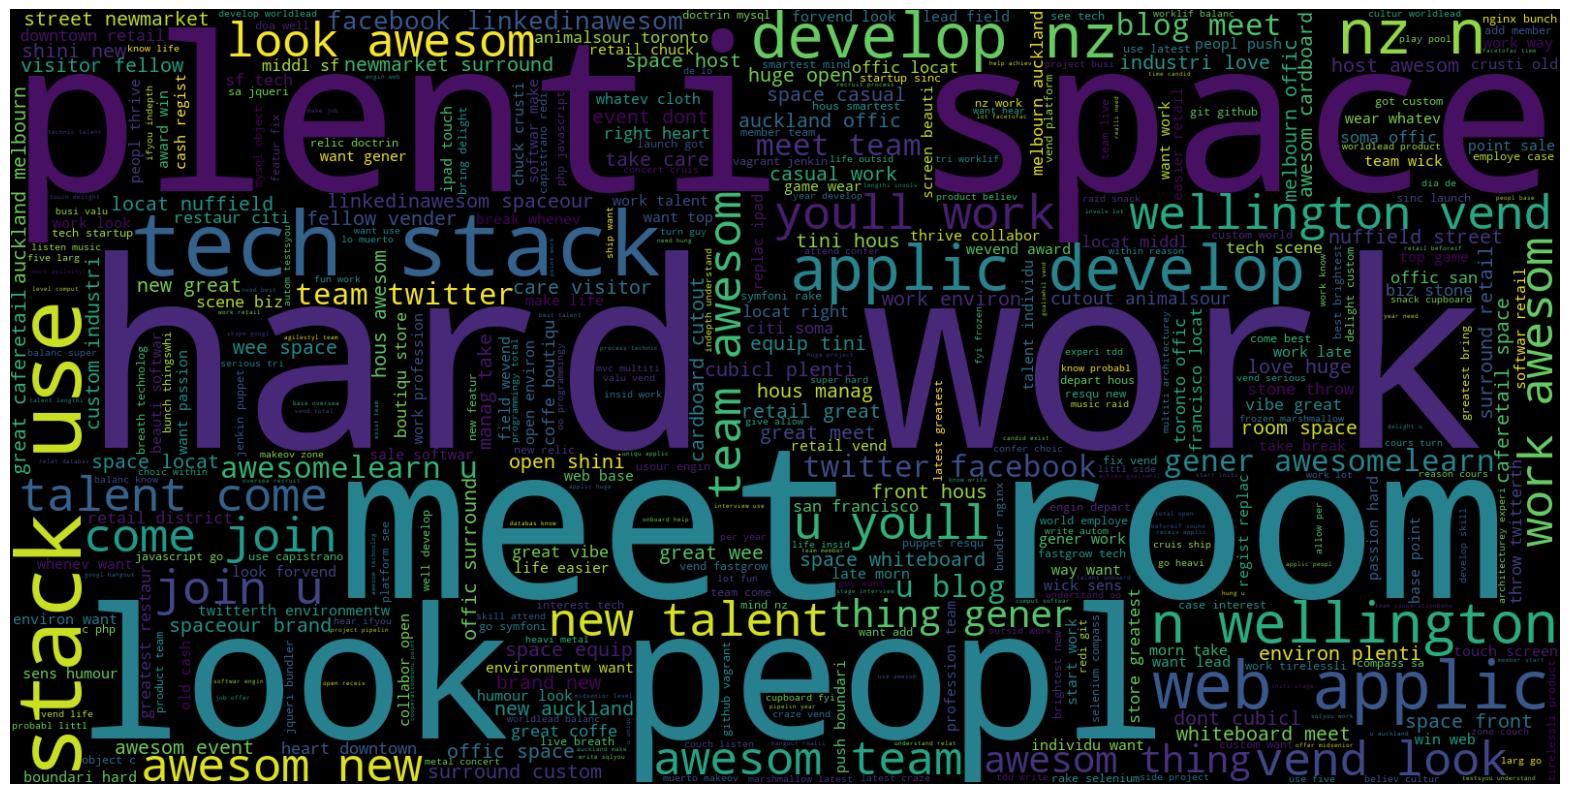

In [66]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(fake_job_postings[fake_job_postings.fraudulent == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# fake_job_postings.to_csv('data/fake_job_postings_cleaned.csv')

In [ ]:
'../data/fake_job_postings_cleaned.csv'

In [61]:
first_item = list(data.values())[0]
print(first_item)
print(first_item.keys())


['Site that cannot be used for any purpose, being contaminated by pollutants.']


AttributeError: 'list' object has no attribute 'keys'